# REDUCIÓN DE LA DIMENSIONALIDAD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
from sklearn.decomposition import PCA
from sklearn.datasets import make_swiss_roll
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.datasets import fetch_openml
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE


## EJEMPLO 1: PCA

PCA identifica el hiperplano que queda más cerca de los datos y, a continuación, proyecta en él los datos.

El siguiente código aplica PCA para reducir la dimensionalidad del conjunto de datos a dos dimensiones:

Este código genera un conjunto de 60 puntos tridimensionales distribuidos en una espiral elíptica ruidosa y luego los rota y desplaza en el espacio 3D.

In [4]:
m = 60
X = np.zeros((m, 3))
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi 
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5 
X += 0.28 * np.random.randn(m, 3)  
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2] 

In [7]:
print(X[:5])

[[-0.47562927 -1.18002627 -0.18665138]
 [-0.32908278  0.18101846 -0.32767249]
 [ 1.1241412   0.33792292  0.15481443]
 [ 0.28072425 -0.21472162  0.43963185]
 [-0.59903727 -0.94120105  0.06412454]]


In [8]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D

In [9]:
print(X2D[:5])

[[-0.87323119  0.29459803]
 [ 0.14888518 -0.51493557]
 [ 1.35121872  0.39950155]
 [ 0.45436676  0.1399845 ]
 [-0.73438909  0.02289346]]


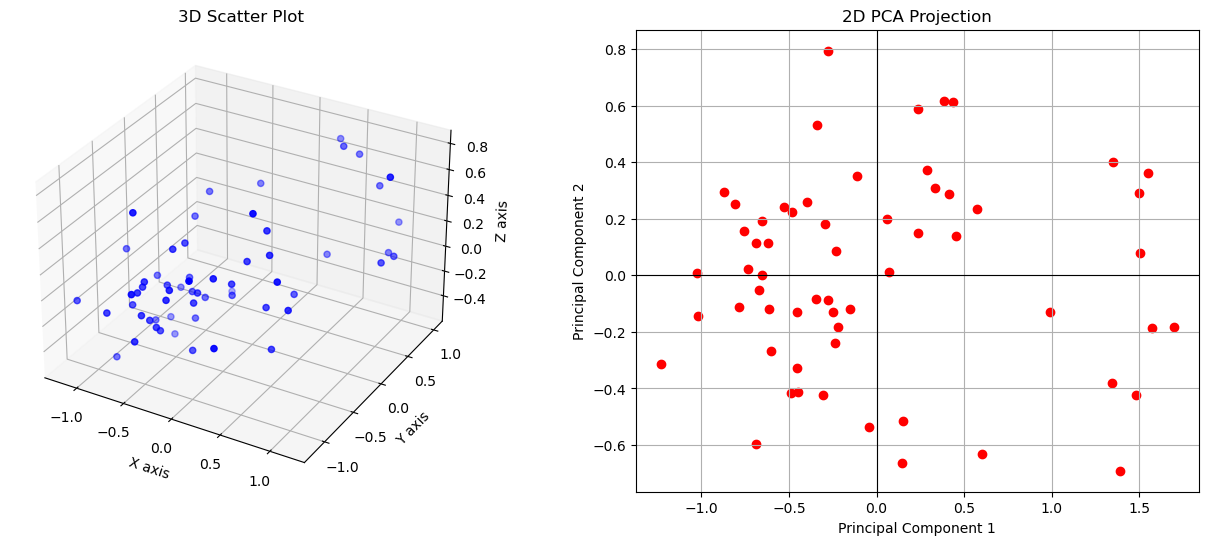

In [11]:
# Visualizar los puntos en un gráfico 3D
fig = plt.figure(figsize=(16, 6))  # Ajustar el tamaño de la figura
ax = fig.add_subplot(121, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c="b", marker="o")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
ax.set_title("3D Scatter Plot")

# Visualizar la proyección 2D utilizando PCA
ax2 = fig.add_subplot(122)
ax2.scatter(X2D[:, 0], X2D[:, 1], c="r", marker="o")
ax2.axhline(0, color="black", linewidth=0.8)  # Línea horizontal del eje
ax2.axvline(0, color="black", linewidth=0.8)  # Línea vertical del eje
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
ax2.set_title("2D PCA Projection")
ax2.grid(True)

plt.show()

In [12]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

Esta salida indica que alrededor del 76 % de la varianza del conjunto de datos queda a lo largo del primer componente principal, mientras que aproximadamente el 15 % queda a lo largo del segundo. Esto deja alrededor de un 9 % para el tercer componente principal, así que es razonable pensar que ese tercer componente lleva poca información.

## EJEMPLO 2: PCA (elegir el número adecuado de dimensiones)

El siguiente código carga y divide el conjunto de datos MNIST y a continuación, calcula el número mínimo de dimensiones requeridas para preservar el 95 % de la varianza del conjunto de entrenamiento:

In [13]:
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [14]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [15]:
pca.n_components_

154

Tras la reducción de dimensionalidad, el conjunto de entrenamiento ocupa mucho menos espacio. 